# <font color='DarkRed'>**Construindo modelos de classificação**
    
<font color='DarkSlateGray'>**Hora de construir nossos classificadores de sentimentos! Estaremos "vetorizando" nossos dados de texto antes de passá-los para nosso modelo. Precisamos vetorizar nossos dados por motivos semelhantes aos de ASCII e Unicode. As máquinas não entendem letras e palavras, mas os valores numéricos são o pão com manteiga.** 
    
<font color='DarkSlateGray'>**Começaremos analisando 5 modelos:**   
    
- <font color='DarkSlateGray'>**Random Forests**
- <font color='DarkSlateGray'>**Naïve Bayes** 
- <font color='DarkSlateGray'>**K-Nearest Neighbors** 
- <font color='DarkSlateGray'>**Logistic regression** 
- <font color='DarkSlateGray'>**Support Vector Machines (Linear SVC)**    

In [1]:
# Bibliotecas padrão
import re
import csv
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from tqdm.auto import tqdm
import itertools

# Estilo: algumas bibliotecas extras
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud #!pip install wordcloud
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Construindo modelos de classificação
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Avaliação do modelo
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#importar conjunto de dados
df3 = pd.read_csv('twitter_sentiment_data.csv', sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

In [3]:
df3.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


### <font color='OrangeRed'>**Divisão de validação(teste) e de treino**
    
<font color='DarkSlateGray'>**Como em todas as tarefas de Aprendizado Supervisionado, precisamos dividir nossos dados em (pelo menos) conjuntos de Treinamento e Validação(teste). Normalmente, os dados serão fornecidos a você como conjuntos de treinamento e teste; mas no nosso caso, temos um CSV enorme, então precisamos fazer essa divisão nós mesmos. Essas divisões nos permitem treinar nosso modelo, mas também nos dão a capacidade de testar seu desempenho em dados que não deveriam ter visto. Esto nos permitirá evaluar el rendimiento de nuestro modelo y elegir el mejor modelo para usar en nuestro envío.**  

In [27]:
X = df3['message']
y = df3['sentiment'] #alvo
#x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 0)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

### <font color='OrangeRed'>**Pipelines**
    
<font color='DarkSlateGray'>**Os pipelines consistem em 2 etapas, vetorização e ajuste do modelo.** 
    
<font color='DarkSlateGray'>**As máquinas, ao contrário dos humanos, não podem entender o texto bruto. As máquinas só podem ver números. Particularmente, técnicas estatísticas como aprendizado de máquina só podem lidar com números. Portanto, precisamos converter nosso texto em números.**
    
<font color='OrangeRed'>**O que é TFIDF?** 
    
<font color='DarkSlateGray'>**Essencialmente, ele atribui pontuações de frequência de palavras. Essas pontuações tentam destacar palavras de maior interesse – você pode obter essa ideia analisando a frequência no documento versus a frequência em todos os documentos. O vetorizador TFIDF atribui pontuações de frequência de palavras que tentam destacar palavras que são mais interessantes, por exemplo, freqüente em um documento, mas não em todos os documentos. O TfidfVectorizer tokenizará documentos, aprenderá o vocabulário e as ponderações de frequência de documentos inversas e permitirá que você codifique novos documentos. Outra vantagem deste método é que os vetores resultantes já estão dimensionados.** 
    
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html    

# <font color='DarkRed'>**RANDOM FOREST**
    
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html   
    
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline       

In [5]:
# random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
# random.fit(x_treino, y_treino)
# previsoes_random = random.predict(x_teste)
# previsoes_random
# clf=classifier
# https://towardsdatascience.com/the-triune-pipeline-for-three-major-transformers-in-nlp-18c14e20530
rf = Pipeline([('tfidf', TfidfVectorizer()),('modelo', RandomForestClassifier(max_depth=5,n_estimators=100,
                                                                           criterion='entropy',random_state = 5))])
rf.fit(X_treino, y_treino)
y_pred_rf = rf.predict(X_teste)

In [6]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, y_pred_rf) * 100.0))

Acurácia: 52.14%


In [7]:
Matriz_confusao=confusion_matrix(y_teste, y_pred_rf)
Matriz_confusao

array([[   0,    0, 1137,    0],
       [   0,    0, 2396,    0],
       [   0,    0, 6874,    0],
       [   0,    0, 2776,    0]])

In [8]:
print(classification_report(y_teste, y_pred_rf))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1137
           0       0.00      0.00      0.00      2396
           1       0.52      1.00      0.69      6874
           2       0.00      0.00      0.00      2776

    accuracy                           0.52     13183
   macro avg       0.13      0.25      0.17     13183
weighted avg       0.27      0.52      0.36     13183



/home/miguel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miguel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miguel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### <font color='OrangeRed'>**Análise dados de treino**

In [9]:
previsoes_treino = rf.predict(X_treino)
previsoes_treino

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
#accuracy_score(y_treino, previsoes_treino)

Acurácia: 52.30%


### <font color='OrangeRed'>**Validação Cruzada**

In [11]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [12]:
# tfidf = TfidfVectorizer()
# newx=tfidf.fit_transform(X)
# Criando o modelo
#modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 5, max_depth=5)
#resultado = cross_val_score(modelo, newx, y, cv = kfold)
# cross_val_score(rf=random forest, X, y, cv = kfold)
resultadorf = cross_val_score(rf, X, y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultadorf.mean() * 100.0))

Acurácia Média: 52.25%


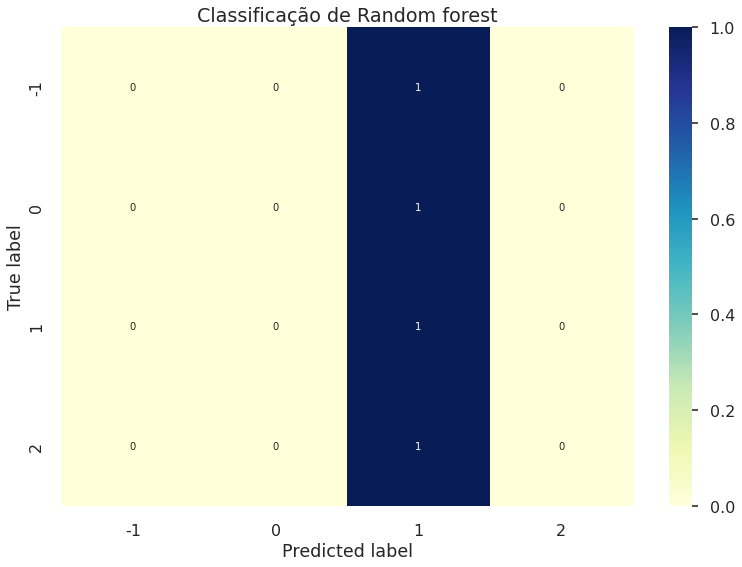

In [13]:
# Gera uma matriz de confusão=cm normalizada
cm = confusion_matrix(y_teste, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,cmap="YlGnBu",xticklabels=rf.classes_,yticklabels=rf.classes_,vmin=0.,vmax=1.,annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Classificação de Random forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### <font color='OrangeRed'>**Observações:**
    
- <font color='Navy'>**Na Matriz de Confusão acima, podemos ver que o modelo prevê estritamente o sentimento Pro. Isso provavelmente se deve ao equilíbrio dos dados, mas como não testamos isso, não podemos concluir isso. Notamos que o modelo de classificação de floresta aleatória faz um trabalho muito ruim em nosso conjunto de dados. O modelo classifica todos os tweets como tweets pró mudanças climáticas.** 
- <font color='Navy'>**Isso resulta em pontuações de precisão, recall e F1 de zero para as classes anti, neutra e de notícias.**   
- <font color='Navy'>**Os métodos baseados em árvore são propensos a overfitting em dados desequilibrados, como o que temos. No entanto, poderíamos re-amostrar potencialmente para que os dados de treinamento tenham uma distribuição mais uniforme de cada sentimento para testar se esse é realmente o problema com nosso RandomForestClassifier.**   
- <font color='Navy'>**A pontuação geral da F1 é de 0,52. Esta é uma pontuação relativamente alta para um modelo que simplesmente classifica todos os tweets em uma única classe. Essa pontuação só poderia ser alcançada porque a maioria dos tweets são de fato pró-mudanças climáticas.**

# <font color='DarkRed'>**Naïve Bayes**
    
<font color='DarkSlateGray'>**Naive Bayes é um algoritmo de classificação que usa o princípio do teorema de Bayes para fazer classificações e assume que as variáveis independentes são estatisticamente independentes umas das outras.**
    
<font color='OrangeRed'>**Teorema de Bayes**:

<font color='Navy'>**$$ P(A \mid B) = \frac{P(B \mid A) * P(A)}{P(B)}$$**  
    
* <font color='DarkSlateGray'>**P(A|B) é a probabilidade posterior da classe (A, alvo) determinado preditor (B, atributos).**  
* <font color='DarkSlateGray'>**P(A) é a probabilidade anterior da classe.**
* <font color='DarkSlateGray'>**P(B|A) é a probabilidade que é a probabilidade da classe preditora dada.**

* <font color='DarkSlateGray'>**P(B) é a probabilidade anterior do preditor.**

<font color='DarkSlateGray'>**Naive Bayes tem 3 métodos de classificação**

<font color='DarkRed'>**Gaussian** : 
<font color='DarkSlateGray'>**É usado na classificação e assume que as características seguem uma distribuição normal.**

<font color='DarkRed'>**Bernoulli** : 
<font color='DarkSlateGray'>**O modelo binomial é útil se seus vetores de recursos são binários (ou seja, zeros e uns). Uma aplicação seria a classificação de texto com um modelo de 'saco de palavras' onde os 1s e 0s são “a palavra ocorre no documento” e “a palavra não ocorre no documento”, respectivamente.**

<font color='DarkRed'>**Multinomial** : 
<font color='DarkSlateGray'>**Se utiliza para conteos discretos. Por ejemplo, digamos que tenemos un problema de clasificación de texto. Aquí podemos considerar los ensayos de Bernoulli, que es un paso más allá y en lugar de "palabra que aparece en el documento", tenemos "contar con qué frecuencia aparece la palabra en el documento", puede pensar en ello como "número de veces que se observa el resultado número x_i sobre los n ensayos”.**

<font color='DarkSlateGray'>**Usaremos el método multinomial.**  
    
https://scikit-learn.org/stable/modules/naive_bayes.html    

In [14]:
nb = Pipeline([('tfidf', TfidfVectorizer()),('modelo', MultinomialNB())])
nb.fit(X_treino, y_treino)
y_pred_nb = nb.predict(X_teste)

In [15]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, y_pred_nb) * 100.0))

Acurácia: 57.76%


In [16]:
# print(metrics.classification_report(y_teste, y_pred_nb))
print(classification_report(y_teste, y_pred_nb))

              precision    recall  f1-score   support

          -1       1.00      0.01      0.02      1137
           0       1.00      0.05      0.10      2396
           1       0.55      1.00      0.71      6874
           2       0.93      0.23      0.36      2776

    accuracy                           0.58     13183
   macro avg       0.87      0.32      0.30     13183
weighted avg       0.75      0.58      0.47     13183



### <font color='OrangeRed'>**Análise dados de treino**

In [17]:
previsoes_treino = nb.predict(X_treino)

In [18]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
#accuracy_score(y_treino, previsoes_treino)

Acurácia: 63.17%


### <font color='OrangeRed'>**Validação Cruzada**

In [19]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [27]:
# tfidf = TfidfVectorizer()
# newx=tfidf.fit_transform(X)
# # Criando o modelo
# modelo = MultinomialNB()
# resultadoNB = cross_val_score(modelo, newx, y, cv = kfold)
resultadoNB = cross_val_score(nb, X, y, cv = kfold)

In [28]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultadoNB.mean() * 100.0))

Acurácia Média: 58.60%


### <font color='OrangeRed'>**Matriz de Confusão:**

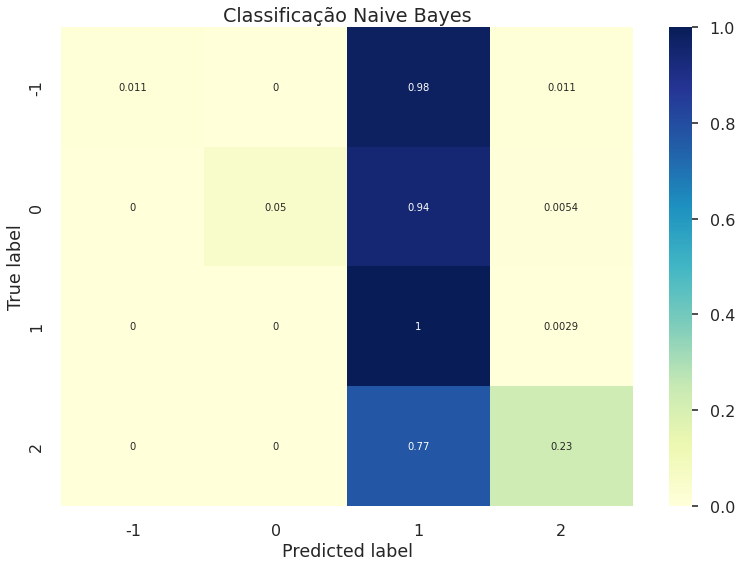

In [29]:
#Gerar uma matriz de confusão normalizada
cm = confusion_matrix(y_teste, y_pred_nb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

#Mostra a matriz de confusão como um mapa de calor
sns.heatmap(cm_norm,cmap="YlGnBu",xticklabels=nb.classes_,yticklabels=nb.classes_,vmin=0.,vmax=1.,annot=True, 
            annot_kws={'size':10})

# Adicionando títulos e rótulos
plt.title('Classificação Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### <font color='OrangeRed'>**Observações:**
    
- <font color='DarkSlateGray'>**Embora o modelo Naive Bayes seja uma pequena melhoria em relação ao modelo de floresta aleatória, ele ainda apresenta um desempenho ruim**
- <font color='DarkSlateGray'>**Esse modelo classifica a maioria dos tweets como pró-mudanças climáticas com previsões melhoradas para a classe de notícias.**
- <font color='DarkSlateGray'>**A precisão, accuracy and F1 scores melhoraram significativamente para a classe de notícias, mas permanecem baixas para neutro e anti.**
- <font color='DarkSlateGray'>**Embora o Naïve Bayes tenha um desempenho melhor, seu desempenho provavelmente é prejudicado pelo equilíbrio de dados que temos. Ou seja, a pontuação geral da F1 é de 0,58, mas essa pontuação só poderia ser alcançada, pois a maioria dos tweets é de fato a favor das mudanças climáticas.**      

# <font color='DarkRed'>**Classificação K-Nearest Neighbors**
    
<font color='DarkSlateGray'>**O algoritmo KNN usa 'semelhança de recursos' para prever os valores de quaisquer novos pontos de dados. Isso significa que o novo ponto recebe um valor com base na semelhança com os pontos no conjunto de treinamento. Basicamente, ele analisa os 𝐾 pontos mais próximos do ponto de dados fornecido e calcula uma semelhança entre eles. Existem vários métodos para calcular o quão próximo o novo ponto de dados se assemelha aos pontos no conjunto de treinamento, dos quais os métodos mais conhecidos são – Euclidiano, Manhattan (para contínuo) e distância de Hamming (para categórico).**    
    
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html    

In [30]:
# classificador ou modelo = clf
knn = Pipeline([('tfidf', TfidfVectorizer()),('clf', KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2))])
knn.fit(X_treino, y_treino)
y_pred_knn = knn.predict(X_teste)

In [31]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, y_pred_knn) * 100.0))

Acurácia: 66.04%


In [32]:
# Gerar um relatório de classificação para o modelo de K-vizinhos mais próximos
print(classification_report(y_teste, y_pred_knn))

              precision    recall  f1-score   support

          -1       0.53      0.41      0.46      1137
           0       0.49      0.45      0.47      2396
           1       0.72      0.79      0.75      6874
           2       0.68      0.63      0.65      2776

    accuracy                           0.66     13183
   macro avg       0.61      0.57      0.58     13183
weighted avg       0.65      0.66      0.65     13183



### <font color='OrangeRed'>**Análise dados de treino**

In [33]:
previsoes_treino = knn.predict(X_treino)

In [34]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 76.77%


### <font color='OrangeRed'>**Validação Cruzada**

In [35]:
# tfidf = TfidfVectorizer()
# newx=tfidf.fit_transform(X)
# # Criando o modelo
# modeloKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
# resultadoKNN = cross_val_score(modeloKNN, newx, y, cv = kfold)

resultadoKNN = cross_val_score(knn, X, y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultadoKNN.mean() * 100.0))

Acurácia Média: 66.14%


### <font color='OrangeRed'>**Matriz de Confusão:**

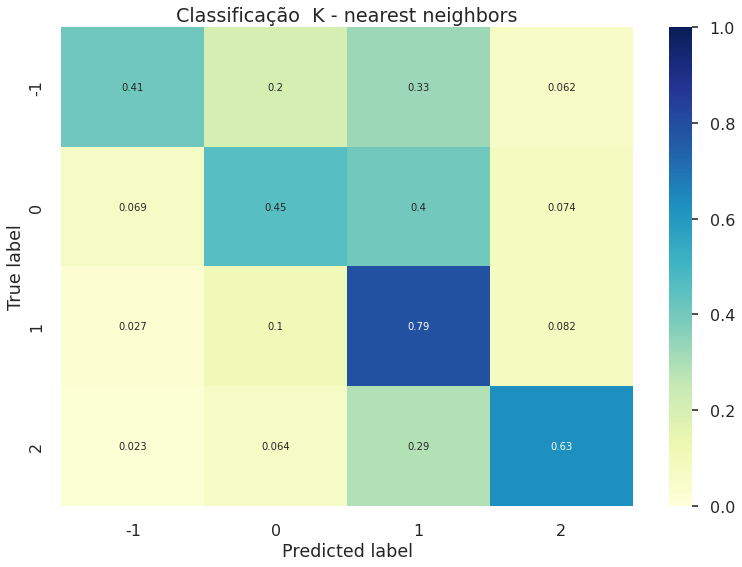

In [36]:
cm = confusion_matrix(y_teste, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,cmap="YlGnBu",xticklabels=knn.classes_,yticklabels=knn.classes_,vmin=0.,vmax=1.,annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Classificação  K - nearest neighbors')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### <font color='OrangeRed'>**Observações:**
    
- <font color='DarkSlateGray'>**KNN é capaz de classificar os tweets com sucesso.**
- <font color='DarkSlateGray'>**KNN melhora tanto em Naïve Bayes quanto em Random Forests.**
- <font color='DarkSlateGray'>**Este modelo também classifica a maioria dos tweets como pró-mudanças climáticas, mas em menor grau em comparação com os 2 modelos anteriores.**
- <font color='DarkSlateGray'>**A precision, accuracy and F1 scores melhoraram significativamente para as classes pró, anti e neutro.** 
- <font color='DarkSlateGray'>**Há uma queda na  F1 score para a classe pró mudanças climáticas à medida que as previsões se tornam mais equilibradas.**
- <font color='DarkSlateGray'>**O geral F1 score é 0.66, que está muito próximo do nosso objetivo**    

# <font color='DarkRed'>**Classificação de regressão logística**

<font color='Navy'>**multinomial (variável dependente com mais de duas categorias).**    
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html    

<font color='DarkSlateGray'>**A regressão logística usa a probabilidade de um ponto de dados pertencer a uma determinada classe para classificar cada ponto de dados em sua melhor classe estimada. A regressão logística foi classificada como o modelo de melhor desempenho para dados linearmente separáveis, especialmente se estiver prevendo dados binários (Sim e NÃO ou 1 e 0), e funciona melhor quando não há desequilíbrio de classe.
A figura abaixo é a função sigmóide que os modelos de regressão logística usam para fazer previsões:**

![](funtion.png)

<font color='DarkSlateGray'>**No nosso caso vamos usar regressão logística multinomial (variável dependente com mais de duas categorias). A Regressão Logística Multinomial é uma generalização da Regressão Logística, para que possa lidar com várias classes. Normalmente, a regressão logística funciona bem quando você separa linearmente as classes em questão. Como Naïve Bayes e Random Forests, é muito sensível ao equilíbrio de classes.**

In [44]:
# modelo ou classificador = clf
lr = Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression(C=1,class_weight='balanced',max_iter=1000))])

In [45]:
lr.fit(X_treino, y_treino)
y_pred_lr = lr.predict(X_teste)

In [46]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, y_pred_lr) * 100.0))

Acurácia: 70.88%


In [47]:
# Gerar um relatório de classificação para o modelo regressão logística
print(classification_report(y_teste, y_pred_lr))

              precision    recall  f1-score   support

          -1       0.53      0.66      0.59      1137
           0       0.57      0.53      0.55      2396
           1       0.84      0.72      0.77      6874
           2       0.65      0.86      0.74      2776

    accuracy                           0.71     13183
   macro avg       0.65      0.69      0.66     13183
weighted avg       0.73      0.71      0.71     13183



### <font color='OrangeRed'>**Análise dados de treino**

In [41]:
prev_treino = lr.predict(X_treino)

In [42]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, prev_treino)* 100.0))
#accuracy_score(y_treino, previsoes_treino)

Acurácia: 84.67%


### <font color='OrangeRed'>**Validação Cruzada**

In [35]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [48]:
# tfidf = TfidfVectorizer()
# newx=tfidf.fit_transform(X)
# # Criando o modelo
# modelolr = LogisticRegression(C=1,class_weight='balanced',max_iter=1000)
# resultadolr = cross_val_score(modelolr, newx, y, cv = kfold)

resultadolr = cross_val_score(lr, X, y, cv = kfold)

In [49]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultadolr.mean() * 100.0))

Acurácia Média: 71.40%


### <font color='OrangeRed'>**Matriz de Confusão:**

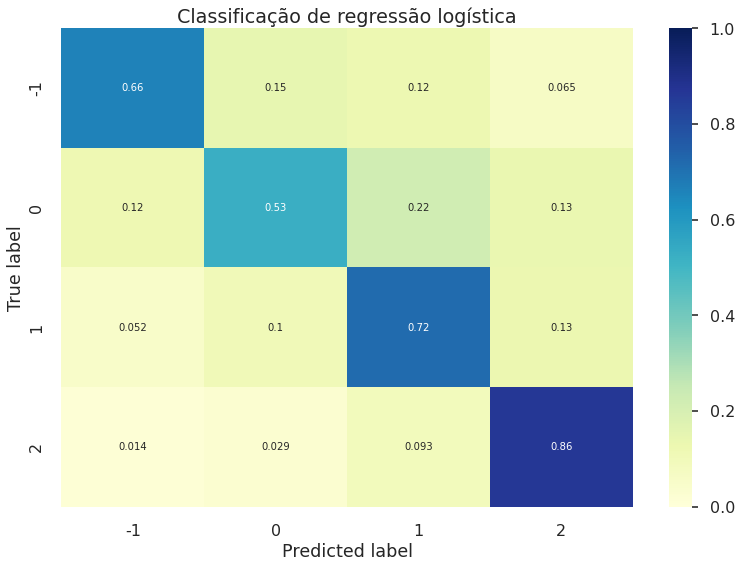

In [50]:
cm = confusion_matrix(y_teste, y_pred_lr)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm,cmap="YlGnBu",xticklabels=lr.classes_,yticklabels=lr.classes_,vmin=0.,vmax=1.,annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Classificação de regressão logística')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### <font color='OrangeRed'>**Observações:**
    
- <font color='DarkSlateGray'>**A regressão logística se sai muito bem, especialmente em comparação com os modelos anteriores, já que é capaz de classificar com sucesso os tweets.**
- <font color='DarkSlateGray'>**Este modelo classifica a maioria dos tweets com sucesso com limites claros e menos confusão em torno da classe pró-mudanças climáticas.**
- <font color='DarkSlateGray'>**As precision, accuracy and F1 scores melhoraram significativamente para as classes pró, anti e neutro.**
- <font color='DarkSlateGray'>**Há uma queda na F1 score para a classe pró mudanças climáticas à medida que as previsões se tornam mais equilibradas.**     

# <font color='DarkRed'>**Máquinas de vetor de suporte (SVC linear)**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

<font color='DarkSlateGray'>**No algoritmo SVM, plotamos cada item de dados como um ponto no espaço n-dimensional (onde n é o número de recursos que você possui) com o valor de cada recurso sendo o valor de uma determinada coordenada. O objetivo do algoritmo SVM é criar a melhor linha ou limite de decisão que possa separar o espaço n-dimensional em classes para que possamos facilmente colocar o novo ponto de dados na categoria correta no futuro. Esse limite de melhor decisão é chamado de hiperplano. O SVM normalmente usa pontos/vetores extremos para ajudar na criação do hiperplano. Esses vetores são chamados de "vetores de suporte".**
    
<font color='DarkSlateGray'>**Considere o diagrama abaixo no qual existem duas categorias diferentes que são classificadas usando um limite de decisão ou hiperplano:**    

![](SVM.png)

In [14]:
# modelo =clf=classificador
lsvc = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC(class_weight='balanced'))])

In [15]:
lsvc.fit(X_treino, y_treino)
y_pred_lsvc = lsvc.predict(X_teste)

In [16]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, y_pred_lsvc) * 100.0))

Acurácia: 74.24%


In [17]:
#Gera um relatório de classificação para o modo SVC linear
print(classification_report(y_teste, y_pred_lsvc))

              precision    recall  f1-score   support

          -1       0.63      0.60      0.61      1137
           0       0.64      0.48      0.55      2396
           1       0.80      0.83      0.81      6874
           2       0.71      0.82      0.76      2776

    accuracy                           0.74     13183
   macro avg       0.69      0.68      0.68     13183
weighted avg       0.74      0.74      0.74     13183



### <font color='OrangeRed'>**Análise dados de treino**

In [18]:
previsoes_treinosvm = lsvc.predict(X_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treinosvm)* 100.0))

Acurácia: 98.47%


### <font color='OrangeRed'>**Validação Cruzada**

In [28]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [29]:
# tfidf = TfidfVectorizer()
# newx=tfidf.fit_transform(X)
# # Criando o modelo Ojo demora en executar
# model=LinearSVC(class_weight='balanced')
# #modelo = SVC(kernel='rbf', random_state=1, C = 2) 
# resultadosvm = cross_val_score(model, newx, y, cv = kfold)

resultadosvm = cross_val_score(lsvc, X, y, cv = kfold)

In [31]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultadosvm.mean() * 100.0))

Acurácia Média: 74.73%


### <font color='OrangeRed'>**Matriz de Confusão:**

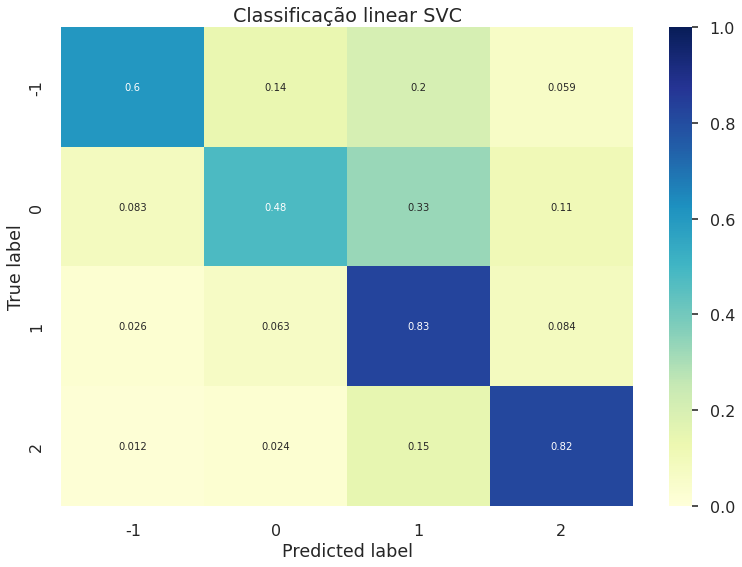

In [22]:
cm = confusion_matrix(y_teste, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,cmap="YlGnBu",xticklabels=lsvc.classes_,yticklabels=lsvc.classes_,vmin=0.,vmax=1.,annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Classificação linear SVC')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### <font color='OrangeRed'>**Observações:**
    
- <font color='DarkSlateGray'>**O SVC linear é capaz de classificar os tweets com sucesso.**
- <font color='DarkSlateGray'>**Este modelo classifica a maioria dos tweets com sucesso com limites claros e menos confusão em torno da classe pró-mudanças climáticas em comparação com os 3 primeiros modelos.**
- <font color='DarkSlateGray'>**Curiosamente, o SVM mostra um maior grau de confusão em torno da classe Pro em comparação com a regressão logística.**
- <font color='DarkSlateGray'>**Isso, no entanto, leva a um aumento na precision, accuracy and f1 score para a classe Pro, que compõe a maioria dos tweets.**
- <font color='DarkSlateGray'>**Linear SVC alcançou a pontuação mais alta da F1 de 0,74**    

In [23]:
# -*- coding: utf-8 -*-
"""
plot a pretty confusion matrix with seaborn
Created on Mon Jun 25 14:17:37 2018
@author: Wagner Cipriano - wagnerbhbr - gmail - CEFETMG / MMC
REFerences:
  https://www.mathworks.com/help/nnet/ref/plotconfusion.html
  https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
  https://stackoverflow.com/questions/5821125/how-to-plot-confusion-matrix-with-string-axis-rather-than-integer-in-python
  https://www.programcreek.com/python/example/96197/seaborn.heatmap
  https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/31720054
  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
"""

#imports
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#

/tmp/ipykernel_17842/2970216876.py:64: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


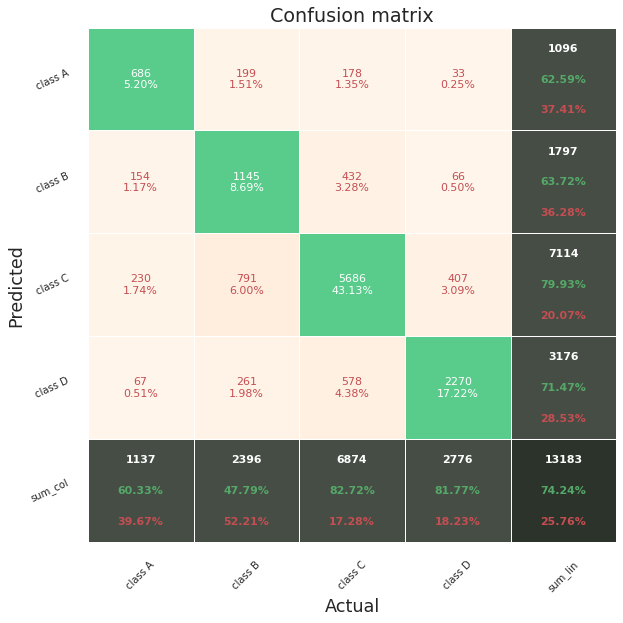

In [25]:
plot_confusion_matrix_from_data(y_teste, y_pred_lsvc)

# <font color='DarkRed'>**Redes Neurais**
    
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    
https://scikit-learn.org/stable/modules/neural_networks_supervised.html    

In [59]:
from sklearn.neural_network import MLPClassifier

In [60]:
redNeu = Pipeline([('tfidf', TfidfVectorizer()),('clf', MLPClassifier(hidden_layer_sizes=(10),
                                                                      activation='logistic',
                                                                      solver='adam', max_iter =800,
                                                                      tol=0.0001, random_state = 5,
                                                                      verbose = True))])

In [61]:
redNeu.fit(X_treino, y_treino)
y_pred_redNeu = redNeu.predict(X_teste)

Iteration 1, loss = 1.43060131
Iteration 2, loss = 1.19330866
Iteration 3, loss = 1.14523918
Iteration 4, loss = 1.10721587
Iteration 5, loss = 1.05831160
Iteration 6, loss = 0.99946392
Iteration 7, loss = 0.93733235
Iteration 8, loss = 0.87734626
Iteration 9, loss = 0.82147732
Iteration 10, loss = 0.76940503
Iteration 11, loss = 0.72033954
Iteration 12, loss = 0.67387591
Iteration 13, loss = 0.62984084
Iteration 14, loss = 0.58794408
Iteration 15, loss = 0.54828561
Iteration 16, loss = 0.51058884
Iteration 17, loss = 0.47509642
Iteration 18, loss = 0.44164729
Iteration 19, loss = 0.41040711
Iteration 20, loss = 0.38125356
Iteration 21, loss = 0.35417023
Iteration 22, loss = 0.32919911
Iteration 23, loss = 0.30609799
Iteration 24, loss = 0.28478536
Iteration 25, loss = 0.26517447
Iteration 26, loss = 0.24717144
Iteration 27, loss = 0.23053328
Iteration 28, loss = 0.21526278
Iteration 29, loss = 0.20114785
Iteration 30, loss = 0.18818871
Iteration 31, loss = 0.17621373
Iteration 32, los

In [62]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, y_pred_redNeu) * 100.0))

Acurácia: 73.15%


In [63]:
print(classification_report(y_teste, y_pred_redNeu))

              precision    recall  f1-score   support

          -1       0.64      0.54      0.59      1137
           0       0.61      0.45      0.52      2396
           1       0.77      0.84      0.81      6874
           2       0.73      0.78      0.75      2776

    accuracy                           0.73     13183
   macro avg       0.69      0.65      0.67     13183
weighted avg       0.72      0.73      0.72     13183



### <font color='OrangeRed'>**Análise dados de treino**

In [64]:
previsoes_treinoRN = redNeu.predict(X_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treinoRN)* 100.0))

Acurácia: 99.97%


### <font color='OrangeRed'>**Validação Cruzada**

In [65]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
resultadosvm = cross_val_score(redNeu, X, y, cv = kfold)

Iteration 1, loss = 1.37687642
Iteration 2, loss = 1.15555615
Iteration 3, loss = 1.11077373
Iteration 4, loss = 1.05638769
Iteration 5, loss = 0.98503279
Iteration 6, loss = 0.90591232
Iteration 7, loss = 0.83007121
Iteration 8, loss = 0.76246640
Iteration 9, loss = 0.70324047
Iteration 10, loss = 0.65139322
Iteration 11, loss = 0.60495229
Iteration 12, loss = 0.56269031
Iteration 13, loss = 0.52353123
Iteration 14, loss = 0.48689447
Iteration 15, loss = 0.45229613
Iteration 16, loss = 0.41924481
Iteration 17, loss = 0.38793081
Iteration 18, loss = 0.35819133
Iteration 19, loss = 0.33028888
Iteration 20, loss = 0.30422734
Iteration 21, loss = 0.28008960
Iteration 22, loss = 0.25791270
Iteration 23, loss = 0.23778611
Iteration 24, loss = 0.21938669
Iteration 25, loss = 0.20268200
Iteration 26, loss = 0.18755538
Iteration 27, loss = 0.17376235
Iteration 28, loss = 0.16132348
Iteration 29, loss = 0.14999668
Iteration 30, loss = 0.13970990
Iteration 31, loss = 0.13033030
Iteration 32, los

/home/miguel/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 1.17984251
Iteration 2, loss = 1.13487053


/home/miguel/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 1.21981847


/home/miguel/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 1.20979821
Iteration 2, loss = 1.14251511


/home/miguel/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 1.22324263
Iteration 2, loss = 1.14380724
Iteration 3, loss = 1.09166145
Iteration 4, loss = 1.01454262
Iteration 5, loss = 0.92271256
Iteration 6, loss = 0.83404207
Iteration 7, loss = 0.75669487
Iteration 8, loss = 0.69143552
Iteration 9, loss = 0.63537240
Iteration 10, loss = 0.58604110
Iteration 11, loss = 0.54111961
Iteration 12, loss = 0.49954467
Iteration 13, loss = 0.46048109
Iteration 14, loss = 0.42374420
Iteration 15, loss = 0.38932140
Iteration 16, loss = 0.35732952
Iteration 17, loss = 0.32771236
Iteration 18, loss = 0.30077011
Iteration 19, loss = 0.27615142
Iteration 20, loss = 0.25385261
Iteration 21, loss = 0.23363077
Iteration 22, loss = 0.21526608
Iteration 23, loss = 0.19866591
Iteration 24, loss = 0.18352608
Iteration 25, loss = 0.16986489
Iteration 26, loss = 0.15741161
Iteration 27, loss = 0.14611839
Iteration 28, loss = 0.13587164


![](7406.JPEG)

## Referencias
   - https://matplotlib.org/
   - https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
   - https://matplotlib.org/stable/gallery/index.html
   - https://matplotlib.org/tutorials/introductory/pyplot.html
   - https://matplotlib.org/tutorials/introductory/customizing.html
   - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html
   - https://matplotlib.org/tutorials/intermediate/legend_guide.html
   - https://matplotlib.org/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
   - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html
   - https://www.w3schools.com/colors/colors_names.asp